Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


DL 8CAF 5030 75.07%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/2.jpg HR 13 H 0025 88.19%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/3.jpg MHO IBR 2286 91.81%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/4.jpg MH 20 EE 7598 91.35%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/5.jpg DL7C N 5617 93.79%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/6.jpg MH 20 BN 9640 93.24%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/7.jpg AP 97.69%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/8.jpg AP 05 BL 98.20%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/9.jpg JE4186 99.91%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/10.jpg KA 100.00%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/11.jpg MH 13 BN 8454 99.34%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/12.jpg KL 01 BT 2525 81.53%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/13.jpg M L 85.33%


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images/14.jpg MH 99.51%
images/15.jpg KL 99.17%


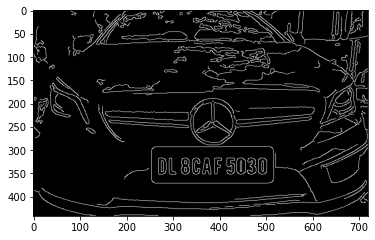

In [2]:
from easyocr import Reader
import cv2
import imutils
import time
from matplotlib import pyplot as plt
import pandas as pd

image = cv2.imread("C:\\Users\\LENOVO\\images\\1.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

blur = cv2.GaussianBlur(gray,(5,5), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

edged = cv2.Canny(blur, 10, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# find the contours, sort them, and keep only the 5 largest ones
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
n_plate_cnt = None

    # loop over the contours
for c in contours:
    # approximate each contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if the contour has 4 points, we can say
    # that we have found our license plate
    if len(approx) == 4:
        n_plate_cnt = approx
        break    
        
        if  n_plate_cnt is None:
            detected = 0
    print ("No contour detected")
# get the bounding box of the contour and 
# extract the license plate from the image
(x, y, w, h) = cv2.boundingRect(n_plate_cnt)
license_plate = gray[y:y + h, x:x + w]

reader = Reader(['en'])
# detect the text from the license plate
detection = reader.readtext(license_plate)

if len(detection) == 0:
        # if the text couldn't be read, show a custom message
        text = "Unable to detect"
        cv2.putText(image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 3)
        image = cv2.resize(image, (500, 350))
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
else:
        # draw the contour and write the detected text on the image
        cv2.drawContours(image, [n_plate_cnt], -1, (0, 255, 0), 3)
        text = detection[0][1]
        accu = f"{detection[0][2] * 100:.2f}%"
        text3= f"{detection[0][1]} {detection[0][2] * 100:.2f}%"

        cv2.putText(image,text3, (x-20, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 3)
        image = cv2.resize(image, (500,350))
        cv2.imshow('license plate', license_plate)
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        raw_data = {'date': [time.asctime( time.localtime(time.time()))], 'v_number': [text],'accuracy':[accu]}
        df = pd.DataFrame(raw_data, columns = ['date', 'v_number'])
        df.to_csv('data.csv',mode='a',index=False, header=False)
        # Print recognized text
        print(text3)
        
        def imageDetection(img_path):
            from easyocr import Reader
            import cv2
            import imutils
            import time
            import pandas as pd
   
            image = cv2.imread(img_path) 
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            blur = cv2.GaussianBlur(gray, (5,5), 0) 
            edged = cv2.Canny(blur, 10, 200) 


            contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
    
            n_plate_cnt = None
    
            for c in contours:
                peri = cv2.arcLength(c, True)
                approx = cv2.approxPolyDP(c, 0.02 * peri, True)
                if len(approx) == 4:
                    n_plate_cnt = approx
                    break        
    
    
            if  n_plate_cnt is None:
                detected = 0
                print ("No contour detected", img_path)
                text = "Unable to detect"
                cv2.putText(image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 3)
                image = cv2.resize(image, (500, 350))
                cv2.imshow('Image', image)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                return
    
            (x, y, w, h) = cv2.boundingRect(n_plate_cnt)
            license_plate = gray[y:y + h, x:x + w]

    
            reader = Reader(['en'])
            detection = reader.readtext(license_plate)


            if len(detection) == 0:
                text = "Unable to detect"
                cv2.putText(image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 3)
                image = cv2.resize(image, (500, 350))
                cv2.imshow('Image', image)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
    
            else:
                cv2.drawContours(image, [n_plate_cnt], -1, (0, 255, 0), 3)
                text = detection[0][1]
                accu = f"{detection[0][2] * 100:.2f}%"
                final_text = f"{detection[0][1]} {detection[0][2] * 100:.2f}%"

                cv2.putText(image,final_text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 3)
                image = cv2.resize(image, (500,350))
                cv2.imshow('license plate', license_plate)
                cv2.imshow('Image', image)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                raw_data = {'date': [time.asctime( time.localtime(time.time()) )],  'v_number': [text]}

                df = pd.DataFrame(raw_data, columns = ['date', 'v_number'])
                df.to_csv('data.csv',mode='a',index=False, header=False)

                print(img_path,final_text)

        for i in range(2,16):
            imageDetection('images/'+str(i)+'.jpg')